# Sustainable Development Data (2000–2022)

## Supervised Machine Learning Algorithm Implementation Steps

This notebook demonstrates the implementation steps of supervised ML using Sustainable Development Data (2000–2022).

## 1. Define the Problem

The **Sustainable Development Goals (SDGs)** are a set of 17 global goals designed to achieve a better and more sustainable future. 
Each country has annual scores (2000–2022) for each goal, along with an overall **SDG Index Score**.  

The problem we want to solve:  
- Predict the **SDG Index Score** of a country based on its individual SDG Goal scores (1–17).  

This is a **Supervised Machine Learning Regression Problem** because:  
- **Input (Features):** `goal_1_score` to `goal_17_score`  
- **Output (Target):** `sdg_index_score` (a continuous numerical value)  
- **Learning Type:** Supervised, since the dataset already contains labeled outcomes (historical SDG index scores).  

**Why this problem is important?**  
- Helps policymakers forecast future sustainable development performance.  
- Identifies which SDG goals have the strongest influence on the overall index.  
- Supports data-driven decision-making for sustainability initiatives.  


## 2. Data Collection and Understanding

### Dataset Description
The dataset contains Sustainable Development Goals (SDG) performance data for multiple countries from **2000 to 2022**.  
It provides annual scores for each of the 17 SDGs and an overall **SDG Index Score** that summarizes progress.  

- **Rows (records):** 4140  
- **Columns (features):** 21  
- **Time range:** 2000–2022  
- **Granularity:** Country-year level data  
- **Source:** https://www.kaggle.com/datasets/sazidthe1/sustainable-development-report

### Feature Description
- **country_code**: ISO country code  
- **country**: Country name  
- **year**: Year of the observation  
- **sdg_index_score**: Overall SDG Index score (target variable)  
- **goal_1_score**: Score for Goal 1 (No Poverty)  
- **goal_2_score**: Score for Goal 2 (Zero Hunger)  
- **goal_3_score**: Score for Goal 3 (Good Health and Well-being)  
- **goal_4_score**: Score for Goal 4 (Quality Education)  
- **goal_5_score**: Score for Goal 5 (Gender Equality)  
- **goal_6_score**: Score for Goal 6 (Clean Water and Sanitation)  
- **goal_7_score**: Score for Goal 7 (Affordable and Clean Energy)  
- **goal_8_score**: Score for Goal 8 (Decent Work and Economic Growth)  
- **goal_9_score**: Score for Goal 9 (Industry, Innovation, and Infrastructure)  
- **goal_10_score**: Score for Goal 10 (Reduced Inequalities)  
- **goal_11_score**: Score for Goal 11 (Sustainable Cities and Communities)  
- **goal_12_score**: Score for Goal 12 (Responsible Consumption and Production)  
- **goal_13_score**: Score for Goal 13 (Climate Action)  
- **goal_14_score**: Score for Goal 14 (Life Below Water)  
- **goal_15_score**: Score for Goal 15 (Life on Land)  
- **goal_16_score**: Score for Goal 16 (Peace, Justice, and Strong Institutions)  
- **goal_17_score**: Score for Goal 17 (Partnerships for the Goals)  

The target variable for prediction is **`sdg_index_score`**, while the features (`goal_1_score` … `goal_17_score`) represent progress on individual SDGs.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('sdg_index_2000-2022.csv')

# Display shape and first few rows
print(df.shape)
df.head()

(4140, 21)


,country_code,country,year,sdg_index_score,goal_1_score,goal_2_score,goal_3_score,goal_4_score,goal_5_score,goal_6_score,...,goal_8_score,goal_9_score,goal_10_score,goal_11_score,goal_12_score,goal_13_score,goal_14_score,goal_15_score,goal_16_score,goal_17_score
0,AFG,Afghanistan,2000,36.0,28.8,27.3,19.2,1.6,20.8,32.4,...,38.5,5.2,0.0,25.8,94.7,99.4,0.0,51.9,39.2,34.2
1,AFG,Afghanistan,2001,36.3,28.8,30.6,19.4,1.6,20.8,32.4,...,38.5,5.2,0.0,25.8,94.5,99.4,0.0,51.9,39.2,34.2
2,AFG,Afghanistan,2002,36.3,28.8,30.7,19.7,1.6,20.8,32.7,...,38.4,5.2,0.0,26.1,94.1,99.4,0.0,51.8,39.2,34.2
3,AFG,Afghanistan,2003,36.7,28.8,32.5,19.9,1.6,20.8,33.0,...,38.4,5.2,0.0,26.5,94.4,99.4,0.0,51.8,39.2,34.2
4,AFG,Afghanistan,2004,37.1,28.8,32.1,21.1,1.6,20.8,33.3,...,38.5,5.2,0.0,26.8,94.8,99.4,0.0,51.8,39.2,34.2


In [2]:
# Info and statistics
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140 entries, 0 to 4139
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country_code     4140 non-null   object 
 1   country          4140 non-null   object 
 2   year             4140 non-null   int64  
 3   sdg_index_score  4140 non-null   float64
 4   goal_1_score     4140 non-null   float64
 5   goal_2_score     4140 non-null   float64
 6   goal_3_score     4140 non-null   float64
 7   goal_4_score     4140 non-null   float64
 8   goal_5_score     4140 non-null   float64
 9   goal_6_score     4140 non-null   float64
 10  goal_7_score     4140 non-null   float64
 11  goal_8_score     4140 non-null   float64
 12  goal_9_score     4140 non-null   float64
 13  goal_10_score    4140 non-null   float64
 14  goal_11_score    4140 non-null   float64
 15  goal_12_score    4140 non-null   float64
 16  goal_13_score    4140 non-null   float64
 17  goal_14_score 

,year,sdg_index_score,goal_1_score,goal_2_score,goal_3_score,goal_4_score,goal_5_score,goal_6_score,goal_7_score,goal_8_score,goal_9_score,goal_10_score,goal_11_score,goal_12_score,goal_13_score,goal_14_score,goal_15_score,goal_16_score,goal_17_score
count,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000
mean,2011.000000,63.685435,64.815628,57.735531,64.045652,71.990048,55.803309,63.963188,57.340966,69.839493,37.114444,52.369662,69.931739,79.680338,81.925870,48.565097,64.662802,62.194903,55.538720
std,6.634051,10.776469,36.098836,11.121524,22.354993,26.561757,17.281101,15.362064,21.490869,10.004358,25.883834,31.254386,18.171193,16.732118,21.346259,28.007749,13.408318,14.568598,13.017388
min,2000.000000,36.000000,0.000000,7.700000,5.900000,0.000000,3.500000,11.300000,0.100000,38.400000,0.000000,0.000000,13.800000,32.900000,0.000000,0.000000,26.000000,27.900000,15.100000
25%,2005.000000,55.075000,31.500000,52.400000,44.800000,57.375000,43.200000,52.300000,41.300000,64.100000,15.700000,23.900000,55.600000,69.400000,72.800000,42.200000,55.100000,51.600000,46.000000
50%,2011.000000,65.100000,81.000000,58.900000,70.200000,80.600000,57.500000,64.400000,64.450000,70.000000,29.700000,53.850000,75.000000,84.800000,90.900000,59.000000,64.400000,61.000000,54.900000
75%,2017.000000,72.000000,98.600000,65.300000,81.300000,94.400000,68.700000,74.300000,72.000000,76.400000,52.700000,79.925000,84.600000,94.100000,97.200000,67.200000,73.900000,73.500000,64.900000
max,2022.000000,86.800000,100.000000,83.400000,97.300000,100.000000,94.000000,95.100000,99.600000,93.600000,99.200000,100.000000,99.900000,99.000000,99.900000,91.200000,97.900000,96.000000,100.000000


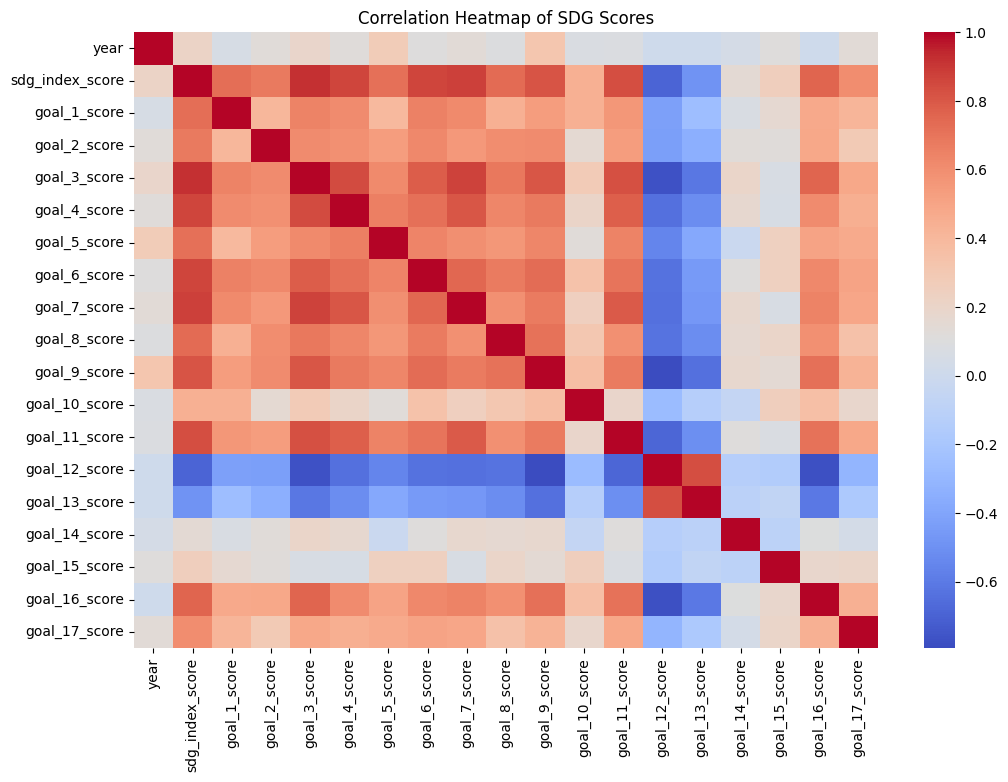

In [4]:
# Correlation heatmap
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap of SDG Scores')
plt.show()


## 3. Data Preprocessing

Data preprocessing ensures the dataset is clean and ready for modeling.  
This includes removing non-numeric columns, handling missing values if any, and scaling the features so that all variables are on a comparable range.


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Drop non-numeric columns
X = df.drop(columns=['country_code', 'country', 'year', 'sdg_index_score'])
y = df['sdg_index_score']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled[:5]

array([[-0.9978155 , -2.73696377, -2.00631105, -2.65037249, -2.02577006,
        -2.05486713, -1.69119995, -3.1329625 , -1.23313644, -1.67579639,
        -2.42895836,  0.89776296,  0.81870278, -1.73419731, -0.95197203,
        -1.57857885, -1.63944549],
       [-0.9978155 , -2.440206  , -1.99736342, -2.65037249, -2.02577006,
        -2.05486713, -1.63070183, -3.1329625 , -1.23313644, -1.67579639,
        -2.42895836,  0.88580845,  0.81870278, -1.73419731, -0.95197203,
        -1.57857885, -1.63944549],
       [-0.9978155 , -2.43121334, -1.98394198, -2.65037249, -2.02577006,
        -2.03533615, -1.66793144, -3.14295935, -1.23313644, -1.67579639,
        -2.41244672,  0.86189945,  0.81870278, -1.73419731, -0.95943099,
        -1.57857885, -1.63944549],
       [-0.9978155 , -2.26934547, -1.97499435, -2.65037249, -2.02577006,
        -2.01580517, -1.52832041, -3.14295935, -1.23313644, -1.67579639,
        -2.3904312 ,  0.8798312 ,  0.81870278, -1.73419731, -0.95943099,
        -1.57857885

## 4. Data Splitting

To evaluate the performance of machine learning models, the dataset is divided into **training** and **testing** sets.  
The training set is used to build the model, while the testing set is used to assess how well the model generalizes to unseen data.


In [6]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((3312, 17), (828, 17))